# What is a Perceptron
A perceptron is a building block of neural network. 

A single perceptron is capable to classify an input into two classes (Binary classifier i-e 0 / 1).
![A perceptron looks like this.](./perceptron_node.png "Perceptron")

## Different parts of a perceptron:

1. Input features (X) from dataset.
2. Weights (W), one for each input feature and a bias B.
3. A Net input Function.
4. Activation Function to normalize the values between (0 - 1).
5. Output (0/1 or Yes/No or Dog/ Cat etc.)



## Sonar Dataset

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [110]:
columns = [i for i in range(1,61)]
columns.append("label")
df = pd.read_csv("sonar.all-data",delimiter = ",",names = columns,header = None)

In [111]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Replacing R with 0 and M with 1 as our perceptron can only deal with numbers.

In [112]:
df["label"].replace({'R': 0, 'M': 1},inplace = True)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df[columns[:-1]], df[columns[-1]], test_size=0.33, random_state=42)

In [115]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
28,0.0100,0.0275,0.0190,0.0371,0.0416,0.0201,0.0314,0.0651,0.1896,0.2668,...,0.0118,0.0088,0.0104,0.0036,0.0088,0.0047,0.0117,0.0020,0.0091,0.0058
42,0.0211,0.0319,0.0415,0.0286,0.0121,0.0438,0.1299,0.1390,0.0695,0.0568,...,0.0053,0.0090,0.0042,0.0153,0.0106,0.0020,0.0105,0.0049,0.0070,0.0080
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0161,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439
142,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0380,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208


In [120]:
y_test.head()

161    1
15     0
73     0
96     0
166    1
Name: label, dtype: int64

In [121]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [128]:
print(X_train.shape)


(139, 60)


## Weights
Let's initialize Weights for each input feature. We have 60 features so we need to define 60 wieghts.

In [131]:
W = np.random.rand(60,1)
print(W.shape)
#W

(60, 1)


## Bias
Let's initialize Bias.


In [132]:
b = np.random.rand(1)
b

array([0.11876666])

## Forward Pass
Forward pass contains two steps:
1. **Net Input Function:** where we multiply each feature x with it's corresponding weight w and then sum all of the resulting values to get a single value Z. 
2. **Activation Function:** Applying activaton funciton on Z.


### Net Input Function
We have to comput the Net Input Function for all the training samples.


![Net input function.](./NIF.png "Net input function")


In [133]:
X_train = X_train.T
X_train.shape

(60, 139)

In [134]:
X_train[0].shape

(139,)

In [135]:
numOfTrainSamples = X_train.shape[1]
numOfFeatures = X_train.shape[0]
Z = np.zeros(numOfTrainSamples)

for i in range(numOfTrainSamples):
    for j in range(numOfFeatures): 
        z = float(X_train[j][i] * W[j])
        Z[i] = Z[i]+z
    Z[i] = Z[i] + b
    

In [136]:
len(Z)

139

In [137]:
Z[:5]

array([ 7.92819306, 10.15527821,  7.59577711,  8.04463496,  9.51819517])

Same net input function can be computed in an optimized manner by using vectorized code.


In [138]:
W.shape

(60, 1)

In [139]:
X_train.shape

(60, 139)

In [140]:
Z = np.dot(W.T,X_train) + b

In [141]:
Z.shape

(1, 139)

In [142]:
Z[0,:5]

array([ 7.92819306, 10.15527821,  7.59577711,  8.04463496,  9.51819517])

### Activation Funciton
We apply activation function to normalize the output values between 0 and 1.
Most commonly used Activation Functions are:
1. Sigmoid
2. Relu
3. Leaky Relu
4. tanh and more

We will use sigmoid for our example.


![Sigmoid function.](./sigmoid.png "Sigmoid Function")

In [143]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [144]:
A = [sigmoid(z) for z in Z[0]]

In [145]:
A[:5]

[0.9996396927548882,
 0.9999611311375289,
 0.9994976831959804,
 0.999679284375272,
 0.9999265031986572]

More optimized way

In [146]:
A = sigmoid(Z)

In [147]:
A[0,:5]

array([0.99963969, 0.99996113, 0.99949768, 0.99967928, 0.9999265 ])

### What's Next?
We have computed the output values, now what to do with them? We need the perceptron to answer in Rock / Mine or in other words 0 / 1.
We need to apply a threshold on the output values. In most cases a threshold of 0.5 is used. All the output values greater than 0.5 will be considered as 1 and less than 0.5 will be considered as 0.

In [148]:
A = np.where(A < 0.5, 0, 1)

In [149]:
A

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]])

In [150]:
y_train

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1])

In [124]:
print(y_train.shape)
print(A.shape)

(139,)
(1, 139)


In [151]:
y_train = np.expand_dims(y_train,axis =0)

In [152]:
y_train.shape

(1, 139)

## Output Analysis
Our perceptron has not properly categorized the input. We have a lot of errors in it. Let's correct our perceptron.


## Back Propagation
In Back propagation we compute errors / loss/ cost using a loss function and then tell each weight that how much it has contributed in the error which is done by taking partial derivative of Loss function with respect to each weight. 

### Error Functions:
1. Mean Error Loss
2. Mean Squared Error 
3. Mean Absolute Error
4. Mean Squared Logarithmic Error Loss (MSLE)
5. Mean Percentage Error
6. Mean Absolute Percentage Error
7. Binary Classification Losses Binary Cross Entropy
8. Multi-Class Cross-Entropy
9. Squared Hinge Loss
10. Hinge Loss


For our example we will be using Binary Cross Entropy Loss:
![Binary cross entropy loss.](./loss.png "Loss function")

In [153]:
def binary_cross_entropy(A, Y):
    return -(Y * np.log(A) + (1 - Y) * np.log(1 - A)).mean()

In [128]:
J = binary_cross_entropy(A, y_train)

<ipython-input-127-f812bb7d02b5>:2: RuntimeWarning: divide by zero encountered in log
  return -(Y * np.log(A) + (1 - Y) * np.log(1 - A)).mean()
<ipython-input-127-f812bb7d02b5>:2: RuntimeWarning: invalid value encountered in multiply
  return -(Y * np.log(A) + (1 - Y) * np.log(1 - A)).mean()


Our implementation of loss function cannot handle log of 0 which is equal to 1 ( log(0) = 1 ), that's why we will use library function for now.

In [154]:
from sklearn.metrics import log_loss
J = log_loss(y_train,A)

In [155]:
J

360.21659711854045

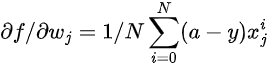## Computing Gradients/ Slopes/ Derivatives
Below are the partial derivatives of Loss function.

![dz.](./dz.png "dz")

![dw.](./dw.png "dw")

![db.](./db.png "db")

In [156]:
dz = A - y_train

In [157]:
X_train.shape

(60, 139)

In [158]:
dz.shape

(1, 139)

We need to compute derivative of each weight for each input.

In [159]:
dw = np.zeros(len(W))
for i in range(len(W)):
    for j in range(X_train.shape[1]):
        #print(str(i)+ " "+ str(j))
        #print(X_train[i][j])
        dw[i] = dw[i] + dz[0][j]*X_train[i][j]
    dw[i] = dw[i]/X_train.shape[1]

In [160]:
dw[:5]

array([0.0104705 , 0.0154964 , 0.01788489, 0.02003237, 0.03098993])

In [160]:
numOfTrainSamples

139

More optimized way

In [161]:
dw =  np.dot(X_train,dz.T)/numOfTrainSamples

In [162]:
dw[:5]

array([[0.0104705 ],
       [0.0154964 ],
       [0.01788489],
       [0.02003237],
       [0.03098993]])

For bias we need just need the mean of sum of all dz.


In [163]:
db = np.sum(dz,axis =1)/numOfTrainSamples

In [164]:
db

array([0.47482014])

## Gradient Desent Step
Now we will update all the weights according to their slopes.

**Learning Rate (alpha)**
alpha is used to control the gradients, if we keep the alpha too high our gradients will diverge from minimum and if we take the alpha too low, the gradients will converge to minimum slowly.

alpha range [0,1]

let's suppose alpha is 0.001

### Update formulas for weight and bias

![w_update.](./w_update.png "w_update")


![b_update.](./b_update.png "b_update")

In [165]:
alpha = 0.001

In [166]:
W = W - alpha * dw

In [167]:
b = b - alpha *db

## Epoch
1 Forward and 1 Backward pass is known as 1 epoch.

## Task
1. Write code to perform N number of epochs until the loss gets close to zero.
2. Compute the loss after each epcoh using sklearn loss function.
3. Once the perceptron gets trained, test the trained perceptron on testing data and report test accuracy, confusion matrix.
4. Try different values of alpha and see how it affects the training process.
5. Use the above vectorized code to make 2 layer Neural Network. 1st layer will contain 2 Perceptrons and last layer will contain 1 perceptron. See how it affects the performance using accuracy and confusion matrix.


In [168]:
alpha = 0.001
for i in range(100):
    #Forward Pass
    Z = np.dot(W.T,X_train,) + b
    A = sigmoid(Z)
    A = np.where(A < 0.5, 0, 1)

    #Backward Pass
    J = log_loss(y_train,A)
    print(J)
    dz = A - y_train
    dw =  np.dot(X_train,dz.T)/numOfTrainSamples
    db = np.sum(dz,axis =1)/numOfTrainSamples
    W = W - alpha * dw
    b = b - alpha *db

360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711854045
360.21659711

In [98]:
X_test = X_test.T
X_test.shape

(60, 69)

In [101]:
Z = np.dot(W.T,X_test,) + b
A = sigmoid(Z)
A = np.where(A < 0.5, 0, 1)
    

In [102]:
A

array([[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 0, 1]])

In [104]:
A.shape

(1, 69)

In [107]:
y_test = np.expand_dims(y_test,axis = 0)

In [108]:
y_test.shape

(1, 69)